In [ ]:
import numpy as np
import math
from numpy import linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


def DM(X,dim,n,L):
    D=np.zeros((n,n))
    D0=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            for k in range(dim):
                D0[i][j]+=(X[i][k]-X[j][k])**2
            D[i][j]=math.sqrt(D0[i][j])
    ep=0.05*D.max()
    W=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            W[i][j]=math.exp(-D[i][j]**2/ep)
    P=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            P[i][i]+=W[i][j]        
    PI=np.linalg.inv(P)
    K=np.matmul(np.matmul(PI,W),PI)
    Q=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            Q[i][i]+=K[i][j]
        
    v0, Q0 = la.eig(Q)
    V0 = np.diag(v0**(-0.5))
    QT=Q0 * V0 * la.inv(Q0)

    Th=np.matmul(np.matmul(QT,K),QT)
    al,vl0=la.eig(Th)
    vl=np.transpose(vl0)
    sort=np.sort(al)
    
    vllar=np.empty([L+1,n],dtype=complex)
    for i in range(L+1):
        al0=np.where(al==sort[-i-1])
        vllar[i]=vl[al0[0][0]]
        
    lambdal=[0+0j]*(L+1)
    for i in range(L+1):
        al0=np.where(al==sort[-i-1])
        lambdal[i]=math.sqrt(al[al0[0][0]]**(1/ep))
    
    phi=np.empty([L+1,n],dtype=complex)
    for i in range(L+1):
        phi[i]=np.matmul(QT,vllar[i])

    return phi, vllar, lambdal





/Users/lxy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part


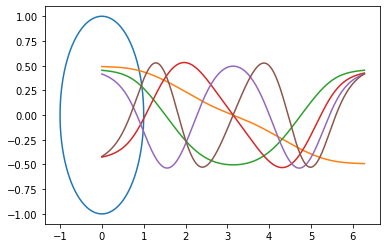

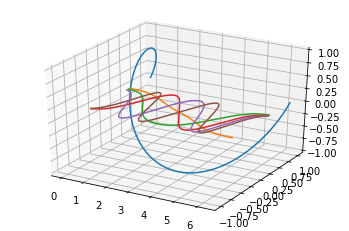

In [6]:
a=np.linspace(0,2000*(math.pi)/1001, 1000)
b=np.cos(a)
c=np.sin(a)
T=np.append(a,b)
TT=T.reshape(2,1000)
X=np.transpose(TT)


phi,vl,lambdal=DM(X,2,1000,5)


plt.plot(b,c)
plt.plot(a,phi[1])
plt.plot(a,phi[2])
plt.plot(a,phi[3])
plt.plot(a,phi[4])
plt.plot(a,phi[5])


plt.show()

ax = plt.axes(projection='3d')
ax.plot3D(a,b,c)
plt.plot(a,phi[1])
plt.plot(a,phi[2])
plt.plot(a,phi[3])
plt.plot(a,phi[4])
plt.plot(a,phi[5])


/Users/lxy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


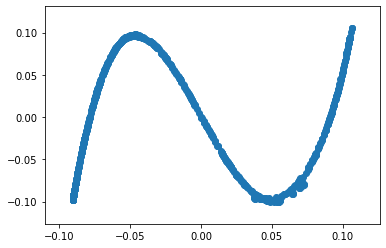

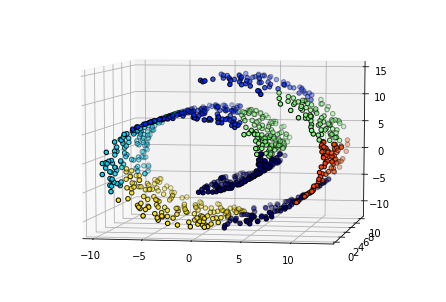

In [15]:
import numpy as np
from sklearn.datasets import make_swiss_roll
import math
from numpy import linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time as time
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering

X,_=make_swiss_roll(n_samples=1000, noise=0.0, random_state=None)
X[:, 1] *= .5
a=X[:,0]
b=X[:,1]
c=X[:,2]



#ax = plt.axes(projection='3d')

#ax.plot3D(a,b,c)

phi,vl,lambdal=DM(X,3,1000,50)

plt.scatter(phi[1], phi[3])


st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(label + 1)),
               s=20, edgecolor='k')



/Users/lxy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


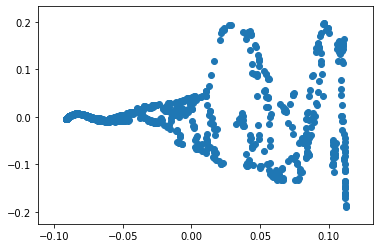

In [9]:
plt.scatter(phi[1], phi[10])

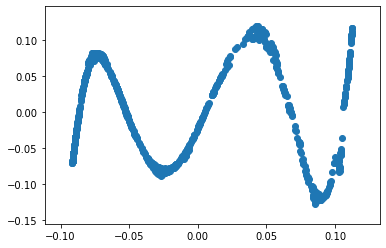

In [10]:
plt.scatter(phi[1], phi[5])

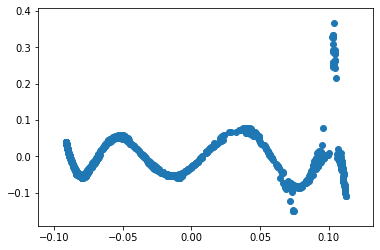

In [11]:
plt.scatter(phi[1], phi[7])

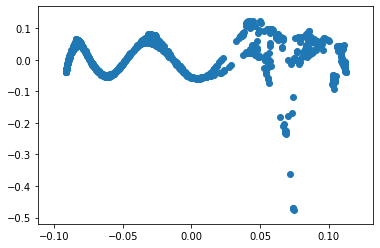

In [12]:
plt.scatter(phi[1], phi[9])

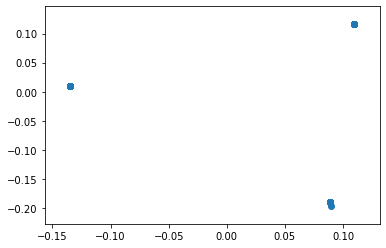

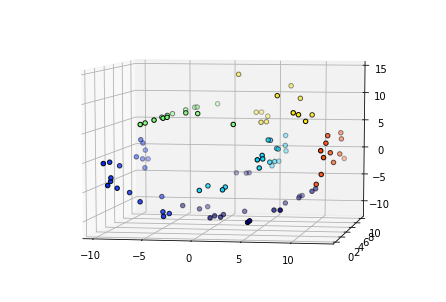

In [18]:
import numpy as np
from sklearn.datasets import make_swiss_roll
import math
from numpy import linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time as time
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering

X,_=make_swiss_roll(n_samples=100, noise=0.0, random_state=None)
X[:, 1] *= .5
a=X[:,0]
b=X[:,1]
c=X[:,2]


#ax = plt.axes(projection='3d')

#ax.plot3D(a,b,c)

phi,vl,lambdal=DM(X,3,100,50)

plt.scatter(phi[1], phi[2])


st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(label + 1)),
               s=20, edgecolor='k')

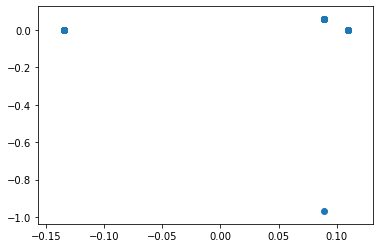

In [20]:
plt.scatter(phi[1], phi[3])

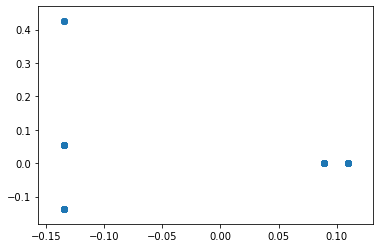

In [21]:
plt.scatter(phi[1], phi[5])

<Figure size 432x288 with 0 Axes>

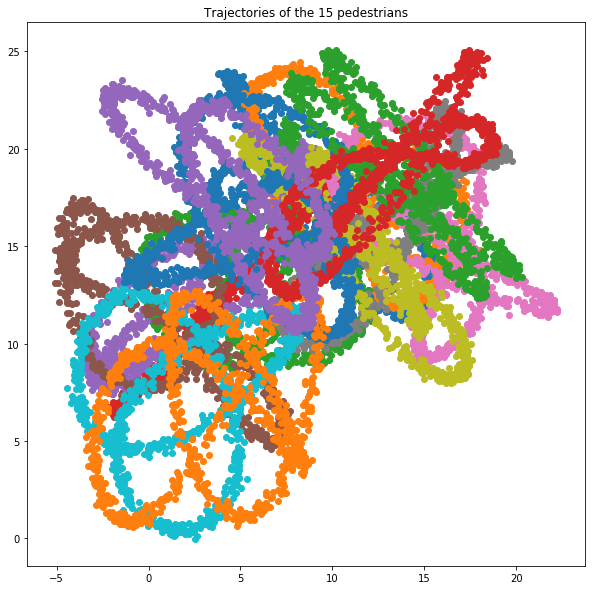

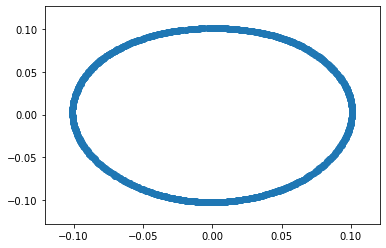

In [26]:
import numpy as np
import math
from numpy import linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd

vadereDF = pd.DataFrame()
with open("data_DMAP_PCA_vadere.txt") as f:
    line = f.readline()
    while line:
        coords = [float(elem) for elem in str(line).split(" ")]
        vadereDF = vadereDF.append(pd.Series(coords), ignore_index=True)
        line = f.readline()

X=np.zeros((1000,30))
for i in range(1000):
    for j in range(30):
        X[i][j]=vadereDF[j][i]
        

phi,vl,lambdal=DM(X,30,1000,500)

plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(vadereDF[0].tolist(), vadereDF[1].tolist())
plt.scatter(vadereDF[2].tolist(), vadereDF[3].tolist())
plt.scatter(vadereDF[4].tolist(), vadereDF[5].tolist())
plt.scatter(vadereDF[6].tolist(), vadereDF[7].tolist())
plt.scatter(vadereDF[8].tolist(), vadereDF[9].tolist())
plt.scatter(vadereDF[10].tolist(), vadereDF[11].tolist())
plt.scatter(vadereDF[12].tolist(), vadereDF[13].tolist())
plt.scatter(vadereDF[14].tolist(), vadereDF[15].tolist())
plt.scatter(vadereDF[16].tolist(), vadereDF[17].tolist())
plt.scatter(vadereDF[18].tolist(), vadereDF[19].tolist())
plt.scatter(vadereDF[20].tolist(), vadereDF[21].tolist())
plt.scatter(vadereDF[22].tolist(), vadereDF[23].tolist())
plt.scatter(vadereDF[24].tolist(), vadereDF[25].tolist())
plt.scatter(vadereDF[26].tolist(), vadereDF[27].tolist())
plt.scatter(vadereDF[28].tolist(), vadereDF[29].tolist())
plt.title("Trajectories of the 15 pedestrians")
plt.show()

plt.scatter(phi[1],phi[2])

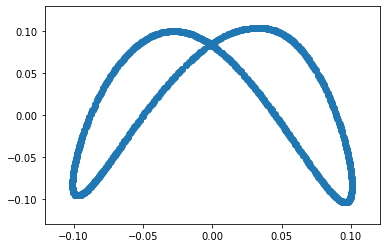

In [27]:
plt.scatter(phi[1],phi[3])

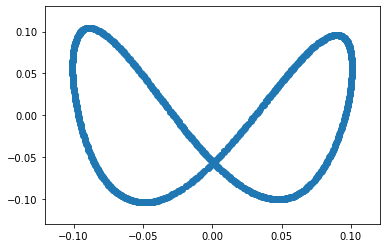

In [28]:
plt.scatter(phi[1],phi[4])

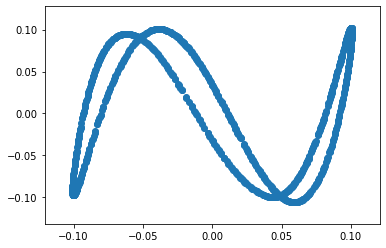

In [29]:
plt.scatter(phi[1],phi[5])

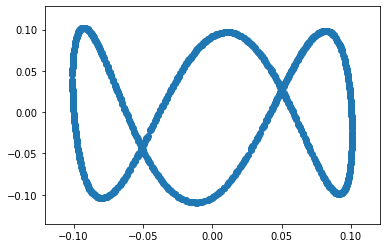

In [41]:
plt.scatter(phi[1],phi[6])

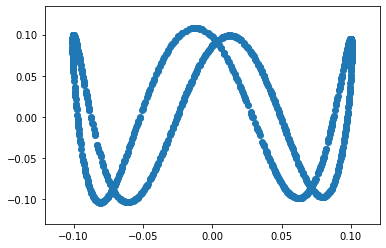

In [31]:
plt.scatter(phi[1],phi[7])

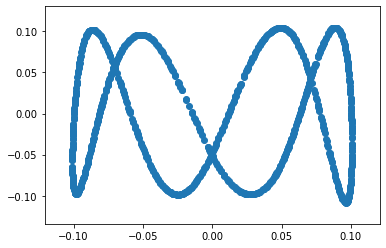

In [32]:
plt.scatter(phi[1],phi[8])

<Figure size 432x288 with 0 Axes>

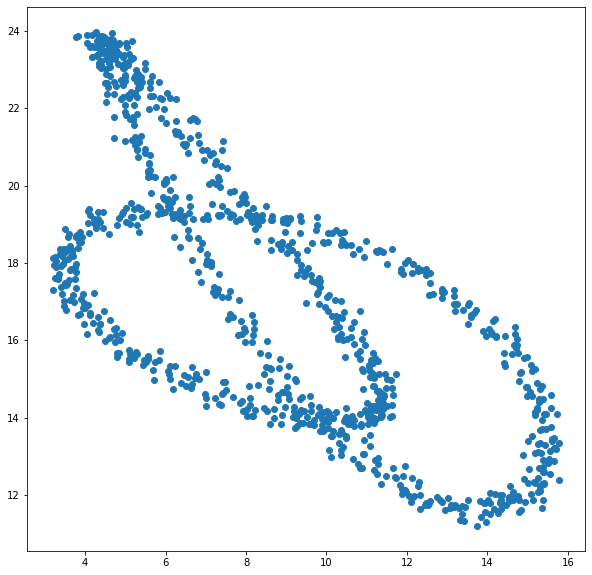

In [33]:
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(vadereDF[0].tolist(), vadereDF[1].tolist())

<Figure size 432x288 with 0 Axes>

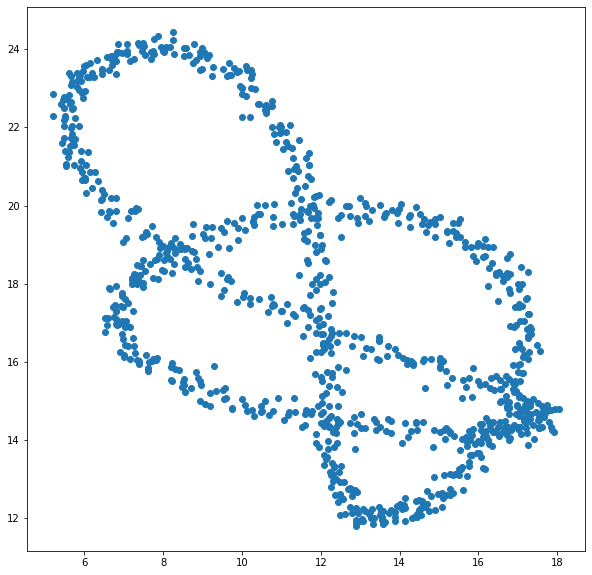

In [34]:
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(vadereDF[2].tolist(), vadereDF[3].tolist())

<Figure size 432x288 with 0 Axes>

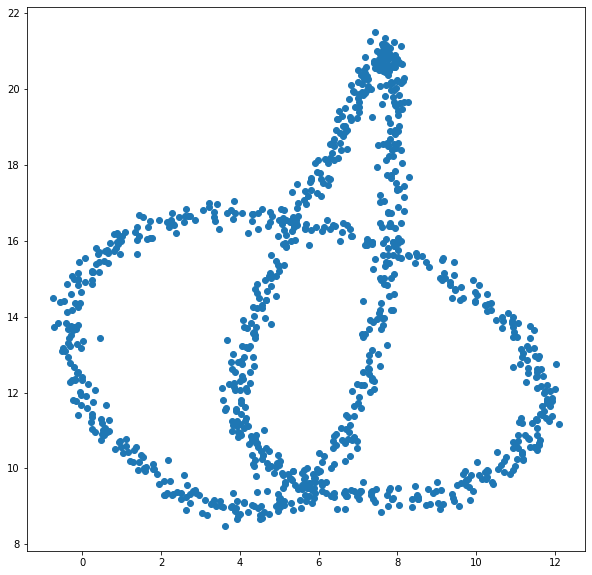

In [35]:
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(vadereDF[4].tolist(), vadereDF[5].tolist())

<Figure size 432x288 with 0 Axes>

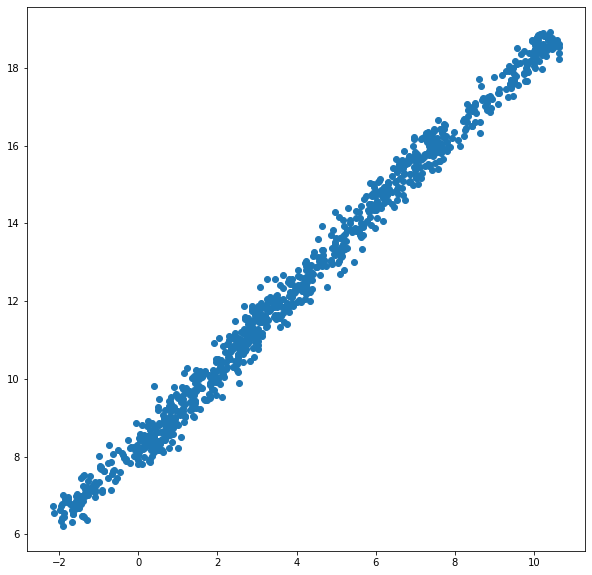

In [37]:
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(vadereDF[6].tolist(), vadereDF[7].tolist())

<Figure size 432x288 with 0 Axes>

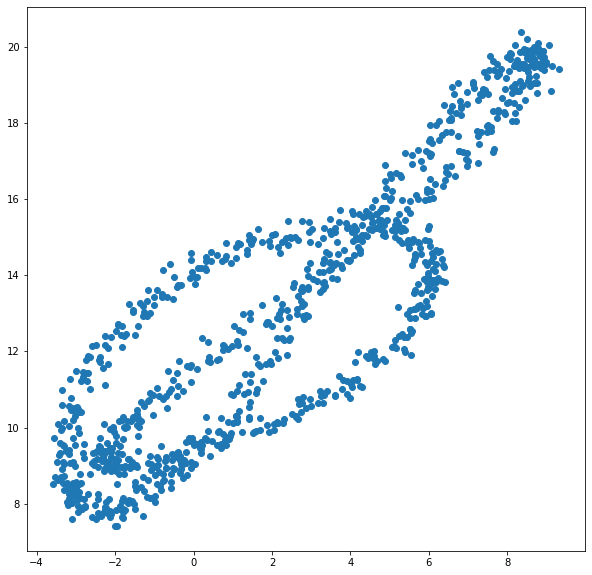

In [38]:
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(vadereDF[8].tolist(), vadereDF[9].tolist())

<Figure size 432x288 with 0 Axes>

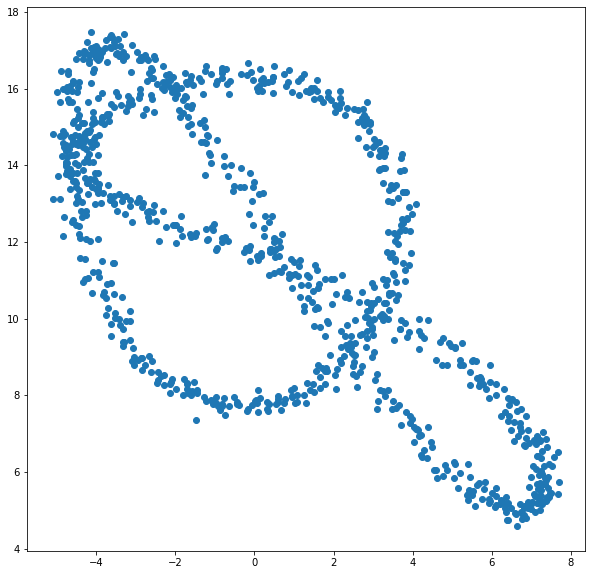

In [39]:
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(vadereDF[10].tolist(), vadereDF[11].tolist())

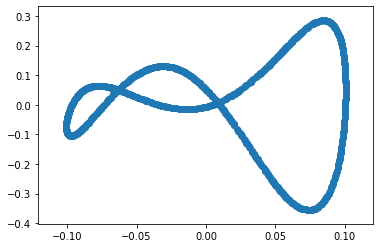

In [55]:
plt.scatter(phi[1],phi[2]+phi[3]+phi[4]+phi[5]+phi[6])